In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data=pd.read_csv("MR data - Compiled Data Set.csv")

data[150:160]

#raw data

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
150,Ghaziabad,"Ghaziabad: Kabaddi player alleges molestation,...",GHAZIABAD: A 34-year-old kabaddi coach was arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,1.0
151,Ghaziabad,"Stopped from beating wife, Ghaziabad man fires...",GHAZIABAD: A 32-year-old man was arrested on S...,Family Dispute,NaN,1.0,NaN,NaN,NaN,NaN,6,1.0,NaN
152,Ghaziabad,"Unhappy with tantrik, woman kidnaps kid",GHAZIABAD: A 35-year-old woman has been arrest...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
153,Ghaziabad,Ghaziabad: Cousin kills 40-year-old after figh...,GHAZIABAD: A 40-year-old man was stabbed to de...,Petty Quarrels,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Ghaziabad,"Ghaziabad: Trio kill man with stone, arrested",GHAZIABAD: Three persons have been arrested fo...,Petty Quarrels,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Ghaziabad,"Ghaziabad: ‘Auto gang’ robs woman of cash, mobile",GHAZIABAD: A 40-year-old woman was allegedly r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1.0,NaN
156,Ghaziabad,Ghaziabad: Youth held for molesting child,GHAZIABAD: A 23-year-old man was arrested on S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8, 10",NaN,1.0
157,Ghaziabad,Ghaziabad: Man rapes woman after spiking drink,GHAZIABAD: A man has been booked for allegedly...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,NaN
158,Ghaziabad,"Ghaziabad: Man kills wife with iron rod, kid f...",GHAZIABAD: A man has been booked for allegedly...,Petty Quarrels,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
159,Ghaziabad,"Ghaziabad: Woman ends life, kin allege pressur...",GHAZIABAD: A 40-year-old woman allegedly commi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,3",1.0,NaN


In [13]:
#data cleaning

data.drop('Title',inplace=True, axis='columns')
data.drop('Text',inplace=True, axis='columns')

data.fillna(0, inplace = True)

data.columns=['A','B','C','D','E','F','G','H','I','J','K']

data['A']=data['A'].str.lower()

data['D']=np.where(data['D']>data['G'],data['D'],data['G'])

data['E']=np.where(data['E']>data['H'],data['E'],data['H'])

del data['G']
del data['H']

data['C']=np.where(data['C']>data['F'],data['C'],data['F'])
data['C']=np.where(data['C']>data['K'],data['C'],data['K'])

data['K']=data['J']
data['J']=data['I']
data['I']=data['K']

data.columns=["City","Reason","children victims","adult male victims","adult female victims","children kidnapped","adults affected","Crime against women","Crime against women"]

data=data.replace(0, np.nan)
data.describe()

,children victims,adult male victims,adult female victims,children kidnapped,adults affected,Crime against women
count,106.000000,102.000000,50.000000,11.000000,116.000000,116.000000
mean,1.160377,1.098039,1.100000,1.181818,1.060345,1.060345
std,0.500225,0.637287,0.505076,0.603023,0.462297,0.462297
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,7.000000,4.000000,3.000000,5.000000,5.000000


In [14]:
data.columns=['A','B','C','D','E','F','I','J','K']

data[['J','K','L']]=data.J.str.split(",",expand=True,)

data.fillna(0, inplace = True)

data['J'] = pd.to_numeric(data['J'])
data['K'] = pd.to_numeric(data['K'])
data['L'] = pd.to_numeric(data['L'])

data.columns=["City","Reason","children victims","adult male victims","adult female victims","children kidnapped","adults affected","Crime against women","Crime against women","Crime against women"]

data[150:160]

,City,Reason,children victims,adult male victims,adult female victims,children kidnapped,adults affected,Crime against women,Crime against women,Crime against women
150,ghaziabad,0,1.0,0.0,0.0,0.0,0.0,8,0,0
151,ghaziabad,Family Dispute,0.0,1.0,0.0,0.0,1.0,6,0,0
152,ghaziabad,0,1.0,0.0,0.0,1.0,0.0,0,0,0
153,ghaziabad,Petty Quarrels,0.0,1.0,0.0,0.0,0.0,0,0,0
154,ghaziabad,Petty Quarrels,0.0,1.0,0.0,0.0,0.0,0,0,0
155,ghaziabad,0,0.0,0.0,0.0,0.0,1.0,11,0,0
156,ghaziabad,0,1.0,0.0,0.0,0.0,0.0,8,10,0
157,ghaziabad,0,0.0,0.0,0.0,0.0,1.0,7,0,0
158,ghaziabad,Petty Quarrels,0.0,0.0,1.0,0.0,0.0,0,0,0
159,ghaziabad,0,0.0,0.0,0.0,0.0,1.0,2,3,0


Visualizing Data

<AxesSubplot:>

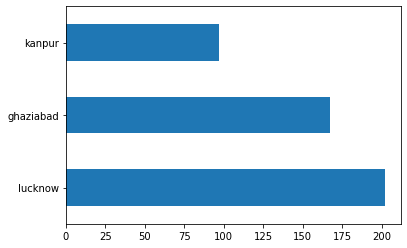

In [15]:
data.columns=['A','B','C','D','E','F','I','J','K','L']
data['A'].value_counts().plot(kind='barh')

Maximum crimes occur in Lucknow.

In [16]:
data.columns=["City","Reason","children victims","adult male victims","adult female victims","children kidnapped","adults affected","Crime against women","Crime against women(0)","Crime against women(1)"]
data=data.replace(0, np.nan)

data.groupby(['Reason'])[["children victims","adult male victims","adult female victims"]].sum()

,children victims,adult male victims,adult female victims
Reason,,,
Casteism,0.0,1.0,1.0
Family Dispute,7.0,5.0,8.0
Love Affairs,0.0,14.0,16.0
Money Disputes,4.0,12.0,0.0
Personal Vendetta,0.0,14.0,2.0
Petty Quarrels,1.0,13.0,5.0
Property Disputes,0.0,15.0,5.0
Unknown reasons,7.0,29.0,15.0


Maximum number of childs are victim of family disputes.
Maximum number of females are victim of Love affairs.
In general, male victims are more than female victims for any crime. 

<AxesSubplot:>

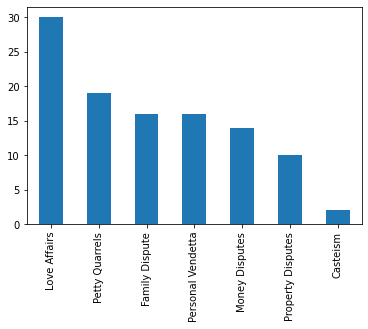

In [17]:
data.columns=['A','B','C','D','E','F','I','J','K','L']
data['B'].loc[data['B']!='Unknown reasons'].value_counts().plot(kind='bar')

Maximum number of crimes occur due to love affairs, whereas casteism leads to fewer crimes.

<BarContainer object of 3 artists>

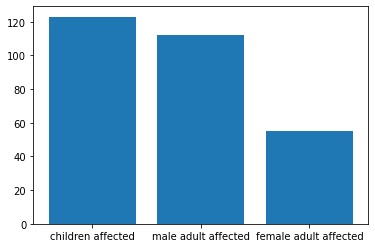

In [18]:
x=data['C'].sum()
y=data['D'].sum()
z=data['E'].sum()

X=np.array(["children affected","male adult affected","female adult affected"])
Y=np.array([x,y,z])

plt.bar(X,Y)

<BarContainer object of 10 artists>

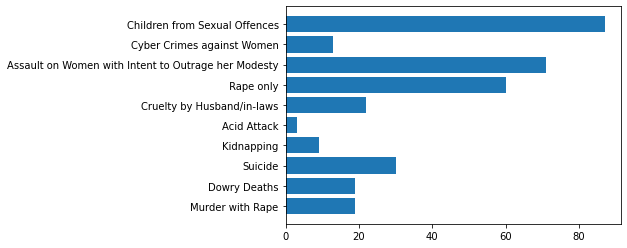

In [19]:
x1=len(data[data.J == 1])+len(data[data.K == 1])+len(data[data.K == 1])
x2=len(data[data.J == 2])+len(data[data.K == 2])+len(data[data.K == 2])
x3=len(data[data.J == 3])+len(data[data.K == 3])+len(data[data.K == 3])
x4=len(data[data.J == 4])+len(data[data.K == 4])+len(data[data.K == 4])
x5=len(data[data.J == 5])+len(data[data.K == 5])+len(data[data.K == 5])
x6=len(data[data.J == 6])+len(data[data.K == 6])+len(data[data.K == 6])
x7=len(data[data.J == 7])+len(data[data.K == 7])+len(data[data.K == 7])
x8=len(data[data.J == 8])+len(data[data.K == 8])+len(data[data.K == 8])
x9=len(data[data.J == 9])+len(data[data.K == 9])+len(data[data.K == 9])
x10=len(data[data.J == 10])+len(data[data.K == 10])+len(data[data.K == 10])

xpoints = np.array(["Murder with Rape","Dowry Deaths","Suicide","Kidnapping","Acid Attack","Cruelty by Husband/in-laws"," Rape only","Assault on Women with Intent to Outrage her Modesty","Cyber Crimes against Women","Children from Sexual Offences"])
ypoints = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10])

plt.barh(xpoints, ypoints)

Maximum female victims are children from sexual offences.